## Vaccination Data by County, NJ

In [7]:
import pandas as pd
import numpy as np
import requests
import time
from matplotlib import pyplot as plt
from config import v_key
from config import p_key

In [8]:
d_state_covid = pd.read_csv("Data/NJ state time series.csv" )
#d_state_covid.head()
len(d_state_covid)

11319

In [64]:
#getting columns needed for vaccination data, cleaning data
d_state_covid['county'] = d_state_covid['county'].str[:-7]
d_state_covid_conv_df=d_state_covid[['date','county','fips','actuals.cases','actuals.deaths','actuals.newCases',
         'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
         'actuals.vaccinesAdministered','actuals.newDeaths']]
clean_vaccine_df =d_state_covid_conv_df.dropna(subset=['actuals.cases','actuals.deaths','actuals.newCases',
                                                    'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
                                                    'actuals.vaccinesAdministered','actuals.newDeaths'])

clean_vaccine_df.head()

#clean_vaccine_df.dtypes
#len(clean_vaccine_df)

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths
393,2021-02-18,A,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0
394,2021-02-19,A,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0
395,2021-02-20,A,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0
396,2021-02-21,A,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0
397,2021-02-22,A,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0


## Population Data by County, NJ

In [11]:
# getting population data from Census API (the same API  as in Age vs Cases analysis used)

pop_url = "https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&for=county:*&in=state:34&key=" + p_key 
pop_response = requests.get(pop_url)

pop_data = pop_response.json()
pop_df = pd.DataFrame((pop_data), columns=("County","Total Population","State_Num","County_Num"))
pop_df = pop_df.drop(0).reset_index(drop=True)

pop_df["fips"] = pop_df["State_Num"] + pop_df["County_Num"]
population_df = pop_df.drop(columns = ['County','County_Num','State_Num'])
population_df["Total Population"] = population_df["Total Population"].astype(float)
population_df["fips"] =population_df["fips"].astype(int)
population_df.head()

,Total Population,fips
0,618795.0,34025
1,367430.0,34021
2,140488.0,34037
3,149527.0,34011
4,328934.0,34035


In [12]:
# merging vaccination data with population data
vaccines_mer_pd = clean_vaccine_df.merge(population_df, how ="left", on ="fips")
vaccines_mer_pd.head()

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population
0,2021-02-18,Atlantic,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0,263670.0
1,2021-02-19,Atlantic,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0,263670.0
2,2021-02-20,Atlantic,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0,263670.0
3,2021-02-21,Atlantic,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0,263670.0
4,2021-02-22,Atlantic,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0,263670.0


## Vaccination % Population By County, NJ 

In [71]:
percent_counties_vaccine = pd.DataFrame(vaccines_mer_pd[["date","fips","county"]])

percent_counties_vaccine["Percentage completed"]= vaccines_mer_pd["actuals.vaccinationsCompleted"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percentage initiated"]= vaccines_mer_pd["actuals.vaccinationsInitiated"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percentage of Cases/Total Population"] =vaccines_mer_pd['actuals.cases']/vaccines_mer_pd["Total Population"]*100 
percent_vaccine_round= percent_counties_vaccine.round(decimals=2)
percent_vaccine_round.head()


,date,fips,county,Percentage completed,Percentage initiated,Percentage of Cases/Total Population
0,2021-02-18,34001,Atlantic,5.35,13.32,9.04
1,2021-02-19,34001,Atlantic,5.58,13.40,9.07
2,2021-02-20,34001,Atlantic,5.69,13.42,9.12
3,2021-02-21,34001,Atlantic,6.03,13.72,9.15
4,2021-02-22,34001,Atlantic,6.29,13.79,9.18


In [73]:
pct_vaccine_Atlantic = percent_vaccine_round.loc[percent_vaccine_round["fips"]==34001]
pct_vaccine_Atlantic.head()


,date,fips,county,Percentage completed,Percentage initiated,Percentage of Cases/Total Population
0,2021-02-18,34001,Atlantic,5.35,13.32,9.04
1,2021-02-19,34001,Atlantic,5.58,13.40,9.07
2,2021-02-20,34001,Atlantic,5.69,13.42,9.12
3,2021-02-21,34001,Atlantic,6.03,13.72,9.15
4,2021-02-22,34001,Atlantic,6.29,13.79,9.18


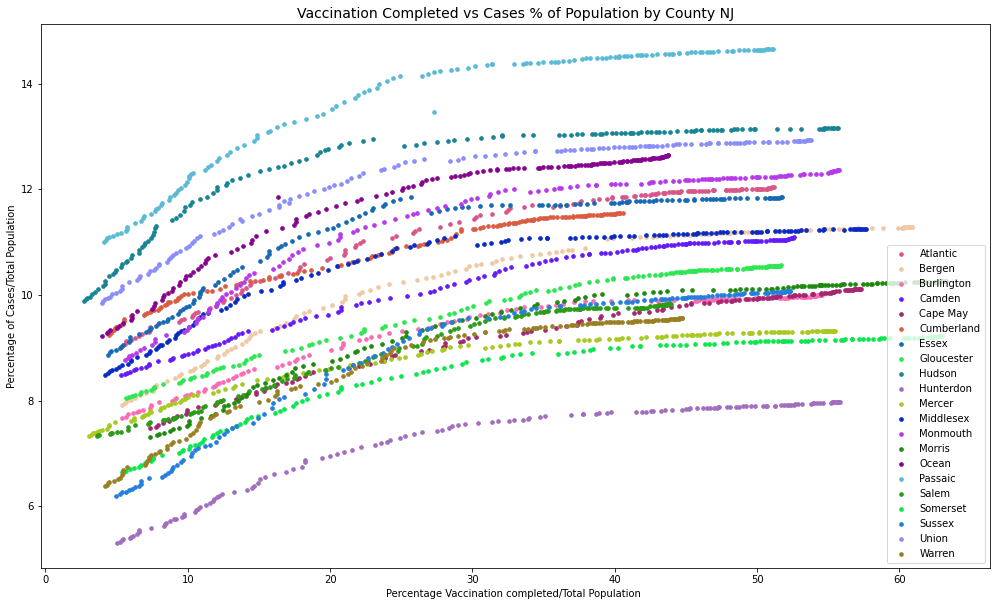

In [117]:
# plot scatter comparing percentage in Vaccination Completed vs  
import random

plt.figure(figsize=(17,10)) 
plt.ylabel("Percentage of Cases/Total Population")
plt.xlabel("Percentage Vaccination completed/Total Population ")
plt.title("Vaccination Completed vs Cases % of Population by County NJ", fontsize=14)
for co in percent_vaccine['county'].sort_values().unique():
    pct_vaccine_co = percent_vaccine_round.loc[percent_vaccine_round["county"]==co]
    random_color="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    plt.scatter(pct_vaccine_co["Percentage completed"],pct_vaccine_co["Percentage of Cases/Total Population"],
                c=random_color, label=co, s=13)
plt.legend() 
plt.savefig("../Images/Vaccination_vs_Cases_in_pct_NJ.png")

plt.show()

In [130]:
#Date - Jun 2021 when data from all counties are available
Data_date = "2021-06-26"
percent_vaccine = percent_counties_vaccine.loc[percent_counties_vaccine["date"]==Data_date].sort_values(by=['Percentage completed'], ascending =False)
percent_vaccine_round= percent_vaccine.round(decimals=2)
len(percent_vaccine_round)


21

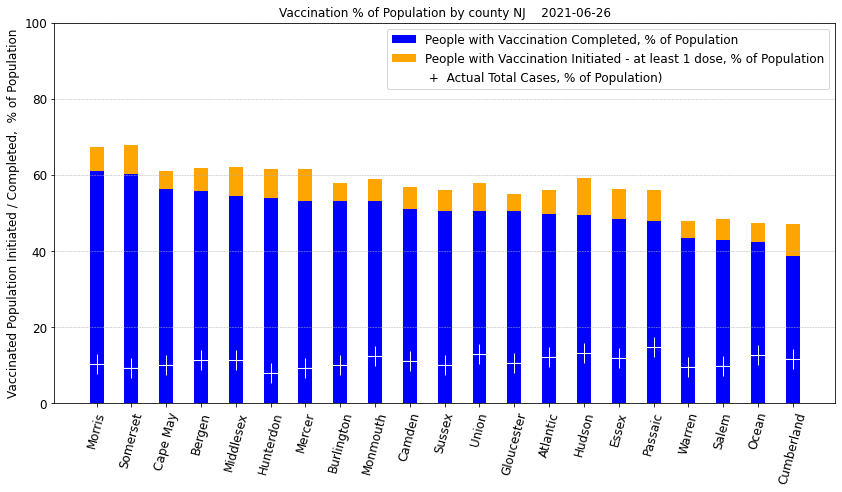

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
header = ['People with Vaccination Completed, % of Population','People with Vaccination Initiated - at least 1 dose, % of Population',
           ' +  Actual Total Cases, % of Population)']
dataset = [percent_vaccine["Percentage completed"],percent_vaccine["Percentage initiated"]]
X_AXIS = percent_vaccine_round["county"]
Y_AXIS = percent_vaccine_round["Percentage of Cases/Total Population"]

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.0, 7.0)

configs = dataset[0]
N = len(configs)
ind = np.arange(N)
width = 0.4
 
p1 = plt.bar(ind, dataset[0], width, color='blue')
p2 = plt.bar(ind, np.array(dataset[1])-np.array(dataset[0]), width, bottom=dataset[0], color='orange')
p =  plt.plot(X_AXIS,Y_AXIS, color = "white", marker = '+', ms= 20, mfc = "r", linewidth = 0.1) 

plt.ylim([0,100])
plt.yticks(fontsize=12)
plt.ylabel("Vaccinated Population Initiated / Completed,  % of Population", fontsize=12)
plt.xticks(ind, X_AXIS, fontsize=12, rotation=75)
plt.title("Vaccination % of Population by county NJ    "  +  (Data_date))
plt.legend((p1[0], p2[0], p[0]), (header[0], header[1], header[2]), fontsize=12)
plt.grid(axis = "y", linestyle = "--", linewidth = 0.5)
plt.savefig("../Images/Vaccination_counties_NJ_Jun2021.png")

plt.show()


## Vaccination - Daily Cases, February 2021 - July 2021, by County NJ
* time frame was adjusted to data, as when available for all counties in NJ 

In [31]:
#adding daily number of vaccination_initiated cases and vaccination_completed cases, dropping columns,cleaning data, creating DataFrame 
time_vaccine_df = pd.DataFrame(vaccines_mer_pd)
time_vaccine_df.head()
time_vaccine_df =time_vaccine_df.sort_values(['county', 'date'])
time_vaccine_df["delta_init"]=time_vaccine_df['actuals.vaccinationsInitiated'].diff()
time_vaccine_df["delta_complete"]=time_vaccine_df['actuals.vaccinationsCompleted'].diff()
index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"]).fillna(0) 
index_county_df.loc[index_county_df['delta_init'] <0,['delta_init']]=0
index_county_df.loc[index_county_df['delta_complete'] <0,['delta_complete']]=0
n_county_vaccine_df = index_county_df.drop(columns = ['actuals.vaccinesAdministered'])
n_county_vaccine_df.head()

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.newDeaths,Total Population,delta_init,delta_complete
county,,,,,,,,,,,,
Atlantic,2021-02-18,Atlantic,34001,23833.0,546.0,153.0,35117.0,14104.0,10.0,263670.0,0.0,0.0
Atlantic,2021-02-19,Atlantic,34001,23909.0,549.0,76.0,35322.0,14712.0,3.0,263670.0,205.0,608.0
Atlantic,2021-02-20,Atlantic,34001,24048.0,551.0,139.0,35390.0,15004.0,2.0,263670.0,68.0,292.0
Atlantic,2021-02-21,Atlantic,34001,24131.0,551.0,83.0,36181.0,15890.0,0.0,263670.0,791.0,886.0
Atlantic,2021-02-22,Atlantic,34001,24207.0,552.0,76.0,36371.0,16576.0,1.0,263670.0,190.0,686.0


In [38]:
nc_vaccine_df = n_county_vaccine_df.rename(columns={'county':'County','date':'Date','fips':'Fips','actuals.vaccinationsInitiated':'Vaccination Initiated','actuals.vaccinationsCompleted':'Vaccination Completed',
                               'delta_init':'Vaccination Iniciated by Day','delta_complete': 'Vaccination Completed by day','actuals.cases':'Total New Cases','actuals.newCases':'Daily Cases', 
                               'Total Population':'Total Population', 'actuals.deaths': 'Total Death','actuals.newDeaths':'Death Daily Cases'})
order_nc_vaccine_df=nc_vaccine_df[['Date','County','Total Population','Total New Cases','Vaccination Initiated','Vaccination Completed', 'Daily Cases','Death Daily Cases','Vaccination Iniciated by Day','Vaccination Completed by day']]
order_nc_vaccine_df.head()


,Date,County,Total Population,Total New Cases,Vaccination Initiated,Vaccination Completed,Daily Cases,Death Daily Cases,Vaccination Iniciated by Day,Vaccination Completed by day
county,,,,,,,,,,
Atlantic,2021-02-18,Atlantic,263670.0,23833.0,35117.0,14104.0,153.0,10.0,0.0,0.0
Atlantic,2021-02-19,Atlantic,263670.0,23909.0,35322.0,14712.0,76.0,3.0,205.0,608.0
Atlantic,2021-02-20,Atlantic,263670.0,24048.0,35390.0,15004.0,139.0,2.0,68.0,292.0
Atlantic,2021-02-21,Atlantic,263670.0,24131.0,36181.0,15890.0,83.0,0.0,791.0,886.0
Atlantic,2021-02-22,Atlantic,263670.0,24207.0,36371.0,16576.0,76.0,1.0,190.0,686.0


In [39]:
#index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"])
county_x= order_nc_vaccine_df.loc[nc_vaccine_df ['County'] == "Morris"]
county_x.head()


,Date,County,Total Population,Total New Cases,Vaccination Initiated,Vaccination Completed,Daily Cases,Death Daily Cases,Vaccination Iniciated by Day,Vaccination Completed by day
county,,,,,,,,,,
Morris,2021-02-18,Morris,491845.0,35898.0,77023.0,35988.0,143.0,4.0,0.0,0.0
Morris,2021-02-19,Morris,491845.0,36077.0,77921.0,38427.0,179.0,0.0,898.0,2439.0
Morris,2021-02-20,Morris,491845.0,36220.0,78499.0,39229.0,143.0,6.0,578.0,802.0
Morris,2021-02-21,Morris,491845.0,36343.0,79729.0,41080.0,123.0,1.0,1230.0,1851.0
Morris,2021-02-22,Morris,491845.0,36515.0,82667.0,42928.0,172.0,1.0,2938.0,1848.0


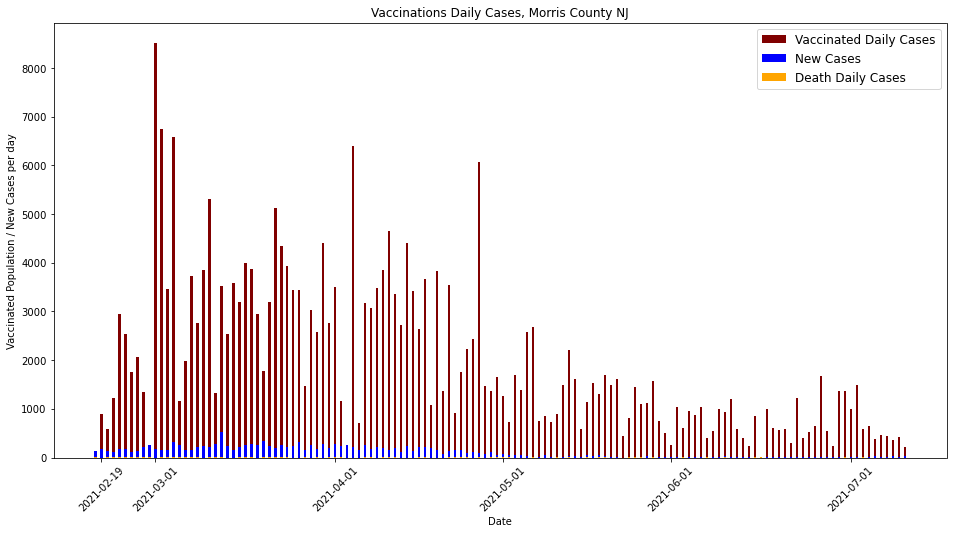

In [62]:
x_axis = county_x["Date"]
values = county_x['Vaccination Iniciated by Day']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
p1_M = plt.bar(x_axis, values, color ='maroon', width = 0.4)
p2_M = plt.bar(x_axis, county_x['Daily Cases'], color ='blue', width = 0.4)
p3_M = plt.bar(x_axis, county_x['Death Daily Cases'], color ='orange', width = 0.4)

#plt.ylim(0,5000)  
plt.xlabel("Date")
plt.ylabel("Vaccinated Population / New Cases per day")
plt.xticks(['2021-02-19','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=45)
plt.title("Vaccinations Daily Cases, Morris County NJ")
plt.legend((p1_M[0], p2_M[0], p3_M[0]), ('Vaccinated Daily Cases', 'New Cases', 'Death Daily Cases'), fontsize=12)

plt.savefig("../Images/Vaccinaction_Morris.png")

plt.show()

In [41]:
county_y=order_nc_vaccine_df .loc[nc_vaccine_df ['County'] == "Cumberland"]
county_y


,Date,County,Total Population,Total New Cases,Vaccination Initiated,Vaccination Completed,Daily Cases,Death Daily Cases,Vaccination Iniciated by Day,Vaccination Completed by day
county,,,,,,,,,,
Cumberland,2021-02-18,Cumberland,149527.0,13823.0,15443.0,6715.0,23.0,5.0,0.0,0.0
Cumberland,2021-02-19,Cumberland,149527.0,13871.0,15561.0,6879.0,48.0,3.0,118.0,164.0
Cumberland,2021-02-20,Cumberland,149527.0,13938.0,15616.0,6987.0,67.0,0.0,55.0,108.0
Cumberland,2021-02-21,Cumberland,149527.0,13955.0,15712.0,7204.0,17.0,1.0,96.0,217.0
Cumberland,2021-02-22,Cumberland,149527.0,14011.0,15731.0,7296.0,56.0,0.0,19.0,92.0
...,...,...,...,...,...,...,...,...,...,...
Cumberland,2021-07-07,Cumberland,149527.0,17261.0,71580.0,59861.0,5.0,0.0,70.0,76.0
Cumberland,2021-07-08,Cumberland,149527.0,17263.0,71705.0,60064.0,2.0,0.0,125.0,203.0
Cumberland,2021-07-09,Cumberland,149527.0,17264.0,71827.0,60196.0,1.0,0.0,122.0,132.0


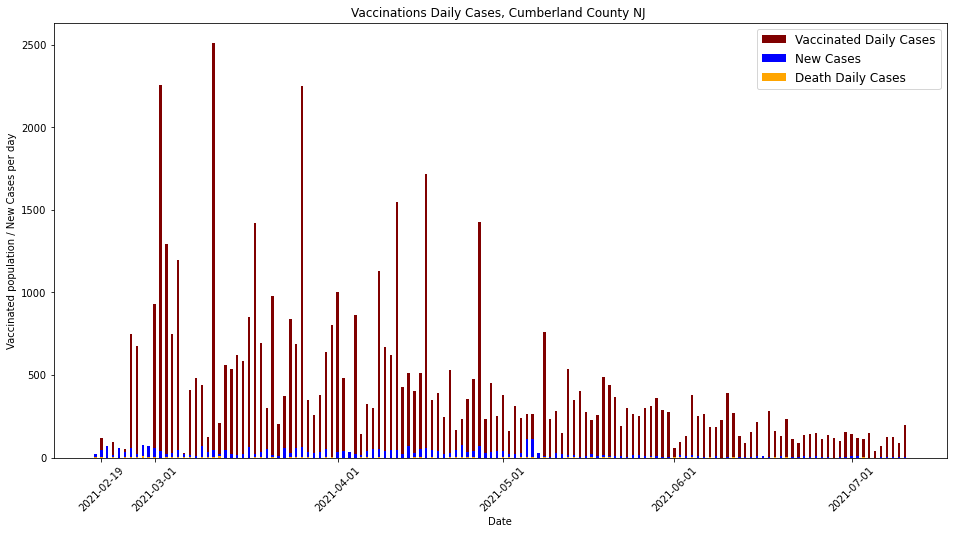

In [63]:
x_axis = county_y["Date"]
values = county_y['Vaccination Iniciated by Day']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
p1_C = plt.bar(x_axis, values, color ='maroon', width = 0.4)
p2_C = plt.bar(x_axis, county_y['Daily Cases'], color ='blue', width = 0.4)
p3_C = plt.bar(x_axis, county_y['Death Daily Cases'], color ='orange', width = 0.4)

#plt.ylim(0,2000)
plt.xlabel("Date")
plt.ylabel("Vaccinated population / New Cases per day")
plt.xticks(['2021-02-19','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=45)
plt.title("Vaccinations Daily Cases, Cumberland County NJ ")
plt.legend((p1_C[0], p2_C[0],p3_C[0]), ('Vaccinated Daily Cases', 'New Cases','Death Daily Cases'), fontsize=12)


plt.savefig("../Images/Vaccinaction_Cumberland.png")

plt.show()

### Regression (Vaccinations vs Cases) 

In [416]:
# Morris completed
#plot: setting x_values, y_values 
x_values = county_x["Vaccination Completed"]
y_values =  county_x["Total New Cases"]


In [417]:
# Morris completed
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = 0.05x +37755.17


The r-squared is: 0.8673609028318877


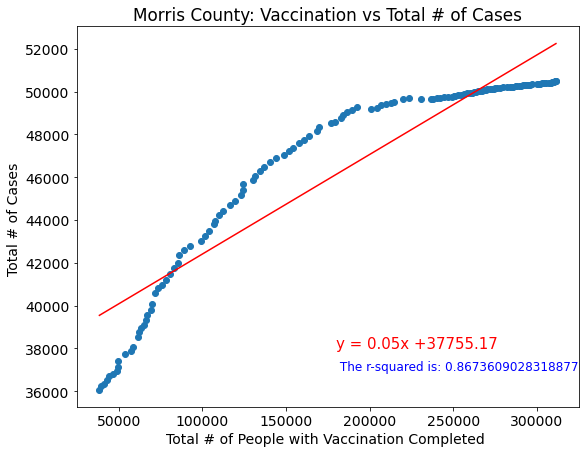

In [418]:
#Morris completed
# Create Plot
plt.figure(figsize=(9,7))
x_values = county_x["Vaccination Completed"]
y_values =  county_x["Total New Cases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Morris County: Vaccination vs Total # of Cases")
plt.ylabel("Total # of Cases ")
plt.xlabel("Total # of People with Vaccination Completed ")

plt.annotate(line_eq,(180000,38000),fontsize=15,color="red")
plt.text(180000,37000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear_regr_Vaccinaction_Morris.png")

plt.show()

In [419]:
#Pearson's correlation coefficient Morris County - between people fully vaccinated (vacc. completed) vs total # of cases
import scipy.stats as st

vacc_compl = county_x.iloc[:,6]
cases_total = county_x.iloc[:,5]
print(f"The correlation coefficient between vaccination completed  and the total number of cases is {round(st.pearsonr(vacc_compl,cases_total)[0],2)}")

The correlation coefficient between vaccination completed  and the total number of cases is 0.98


In [420]:
#Pearson's correlation coefficient - between people vaccinated with 1-dose (vacc.initiated) vs total # of cases
import scipy.stats as st

vacc_init = county_x.iloc[:,5]
cases_total1 = county_x.iloc[:,5]
print(f"The correlation coefficient between vaccination initiated  and the total number of cases is {round(st.pearsonr(vacc_init ,cases_total1)[0],2)}")

The correlation coefficient between vaccination initiated  and the total number of cases is 1.0


In [421]:
# Cumberland completed
#plot: setting x_values, y_values 
x_values = county_y["Vaccination Completed"]
y_values =  county_y["Total New Cases"]


In [422]:
# Cumberland completed
# Performed a linear regression on Vaccination vs New Cases
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = 0.06x +13920.91


The r-squared is: 0.9799645384811047


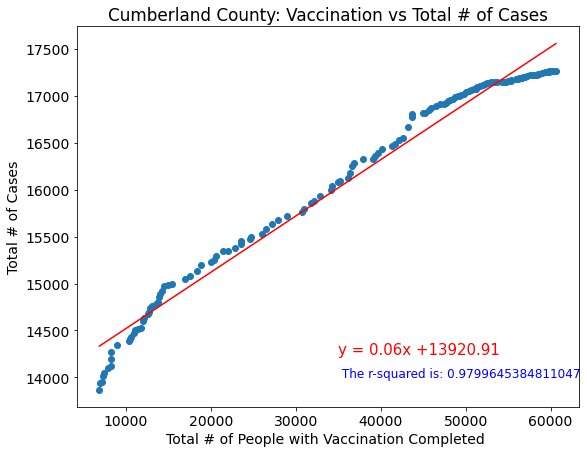

In [423]:
# Cumberland completed
# Create Plot
plt.figure(figsize=(9,7))
x_values = county_y["Vaccination Completed"]
y_values =  county_y["Total New Cases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Cumberland County: Vaccination vs Total # of Cases")
plt.ylabel("Total # of Cases")
plt.xlabel("Total # of People with Vaccination Completed ")

plt.annotate(line_eq,(35000,14250),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.text(35000,14000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
plt.savefig("../Images/Linear_regr_Vaccinaction_Cumberland.png")

plt.show()

In [424]:
#Pearson's correlation coefficient Cumberland- between people fully vaccinated (vacc. completed) vs total # of cases
import scipy.stats as st

vacc_compl = county_y.iloc[:,6]
cases_total = county_y.iloc[:,5]
print(f"The correlation coefficient between vaccination completed  and the total number of cases is {round(st.pearsonr(vacc_compl,cases_total)[0],2)}")

The correlation coefficient between vaccination completed  and the total number of cases is 0.99


In [425]:
#Pearson's correlation coefficient Cumberland - between people vaccinated with 1-dose (vacc.initiated) vs total # of cases

vacc_init = county_y.iloc[:,5]
cases_total1 = county_y.iloc[:,5]
print(f"The correlation coefficient between vaccination initiated  and the total number of cases is {round(st.pearsonr(vacc_init ,cases_total1)[0],2)}")

The correlation coefficient between vaccination initiated  and the total number of cases is 1.0


## Regression by County, NJ (all counties)
    

In [426]:
# counties in NJ for linear regression calculation 
county_list =percent_vaccine['county'].unique()
county_list

array(['Morris', 'Somerset', 'Cape May', 'Bergen', 'Middlesex',
       'Hunterdon', 'Mercer', 'Burlington', 'Monmouth', 'Camden',
       'Sussex', 'Union', 'Gloucester', 'Atlantic', 'Hudson', 'Essex',
       'Passaic', 'Warren', 'Salem', 'Ocean', 'Cumberland'], dtype=object)

Morris
The r-squared is: 0.8673609028318877
Somerset
The r-squared is: 0.8566204077396138
Cape May
The r-squared is: 0.9695213910129404
Bergen
The r-squared is: 0.8855183589921752
Middlesex
The r-squared is: 0.802150730558651
Hunterdon
The r-squared is: 0.8782777995456805
Mercer
The r-squared is: 0.8920197175930423
Burlington
The r-squared is: 0.8966351964296966
Monmouth
The r-squared is: 0.8562633963912234
Camden
The r-squared is: 0.9639723455466386
Sussex
The r-squared is: 0.8912988936725165
Union
The r-squared is: 0.845860263767051
Gloucester
The r-squared is: 0.9716363410678356
Atlantic
The r-squared is: 0.9318829635544598
Hudson
The r-squared is: 0.7505337599018855
Essex
The r-squared is: 0.7698372056426235
Passaic
The r-squared is: 0.8627411335195405
Warren
The r-squared is: 0.9158157654046728
Salem
The r-squared is: 0.9658248055961188
Ocean
The r-squared is: 0.8993335432171885
Cumberland
The r-squared is: 0.9799645384811047


C:\Users\dasa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


,County,R-squared,Line Equation
0,Morris,[0.8673609028318877],[y = 0.05x +37755.17]
1,Somerset,[0.8566204077396138],[y = 0.04x +23291.54]
2,Cape May,[0.9695213910129404],[y = 0.05x +6910.82]
3,Bergen,[0.8855183589921752],[y = 0.06x +78150.04]
4,Middlesex,[0.802150730558651],[y = 0.04x +75270.21]
5,Hunterdon,[0.8782777995456805],[y = 0.05x +7030.37]
6,Mercer,[0.8920197175930423],[y = 0.03x +28296.63]
7,Burlington,[0.8966351964296966],[y = 0.04x +35256.82]
8,Monmouth,[0.8562633963912234],[y = 0.06x +57784.46]
9,Camden,[0.9639723455466386],[y = 0.05x +42947.25]


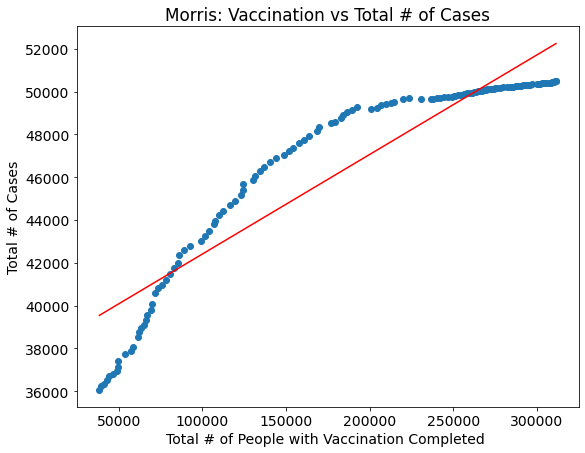

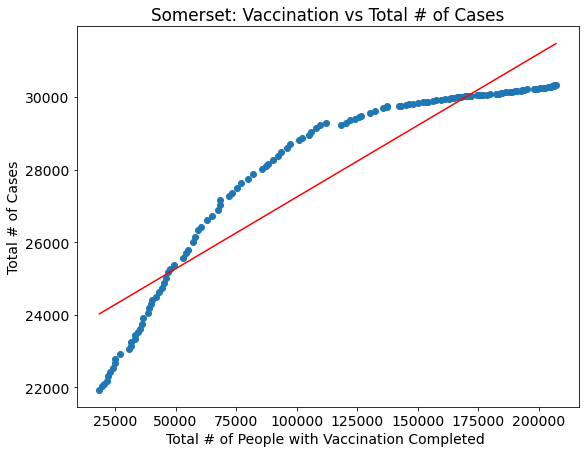

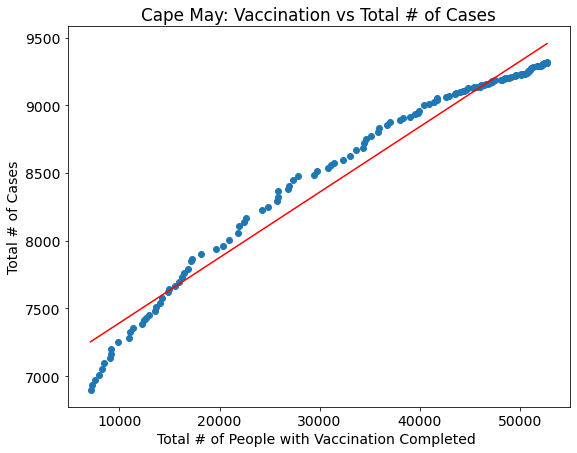

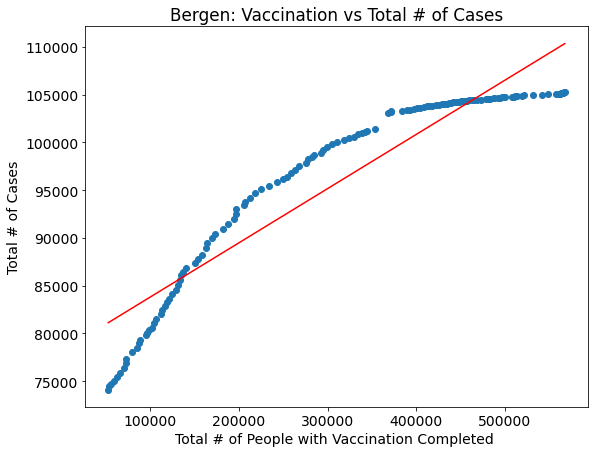

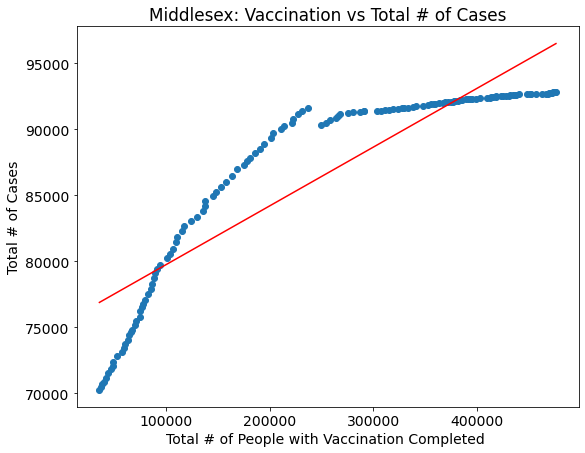

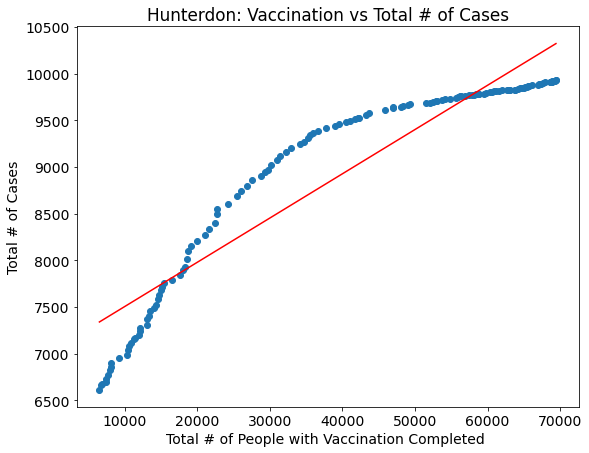

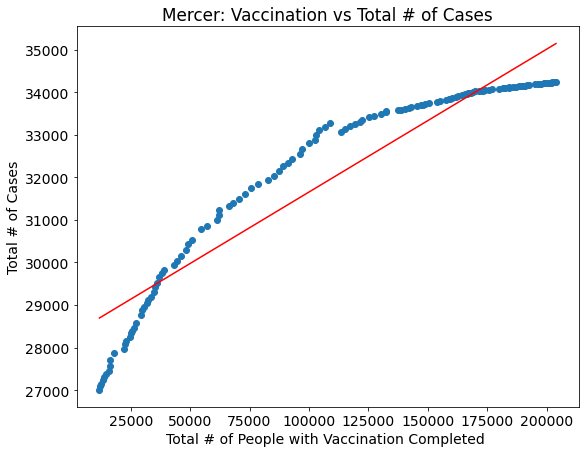

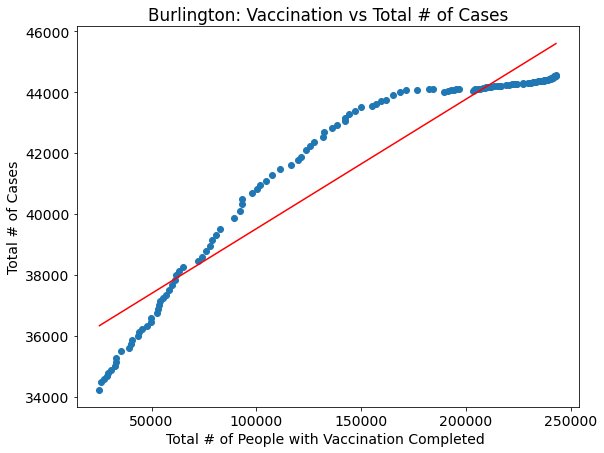

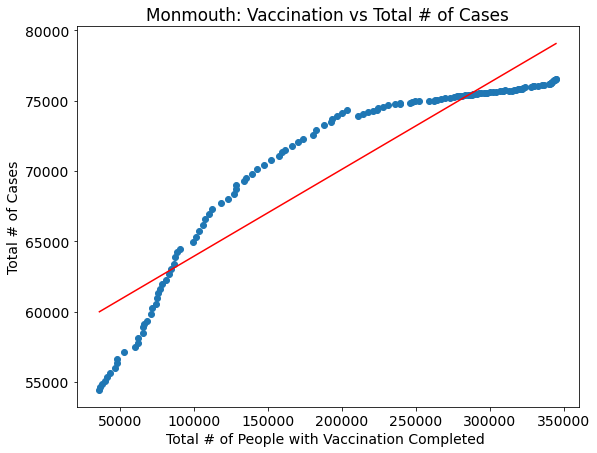

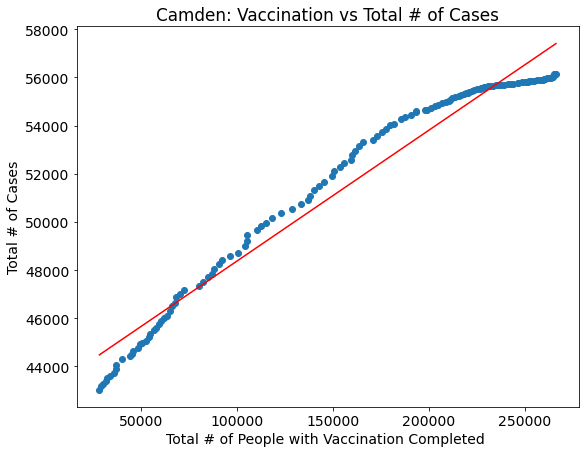

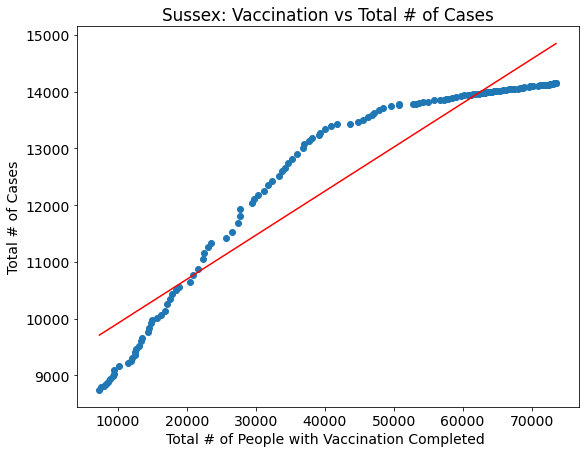

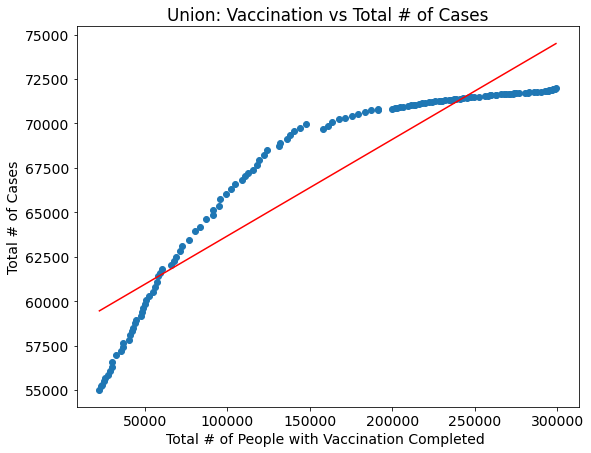

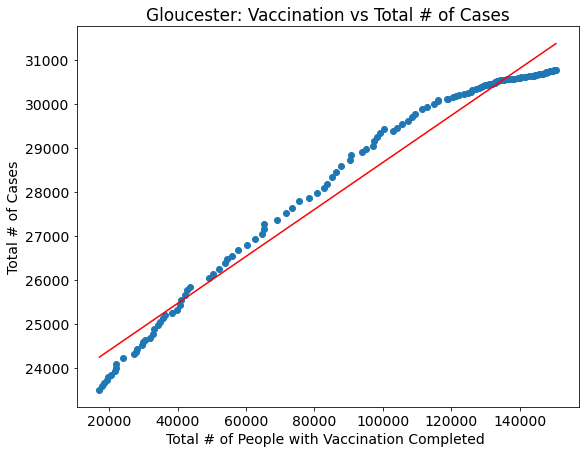

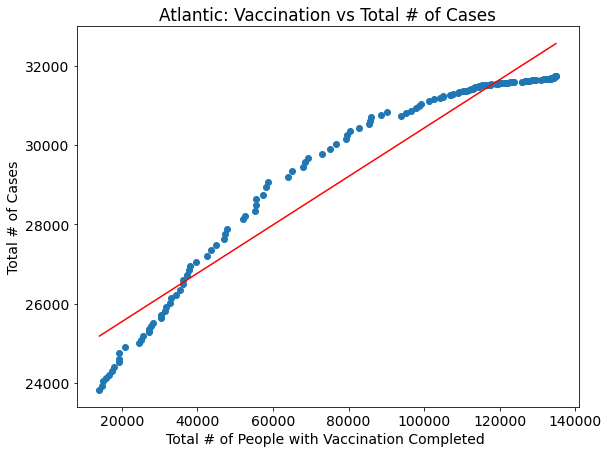

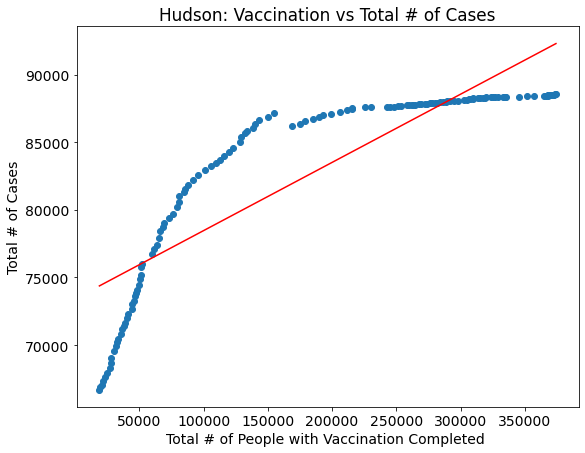

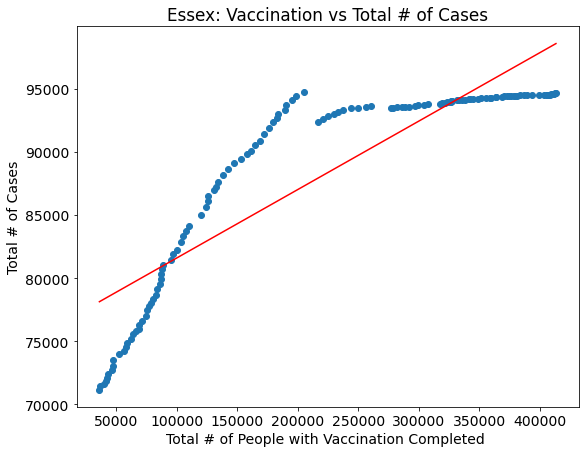

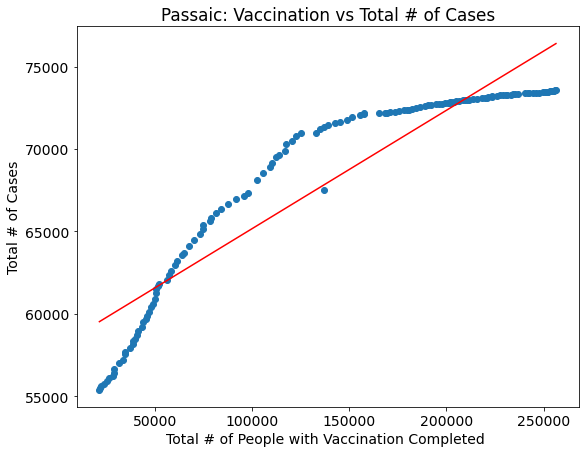

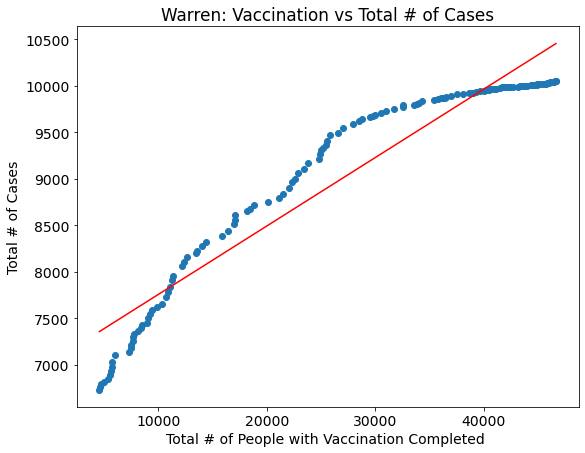

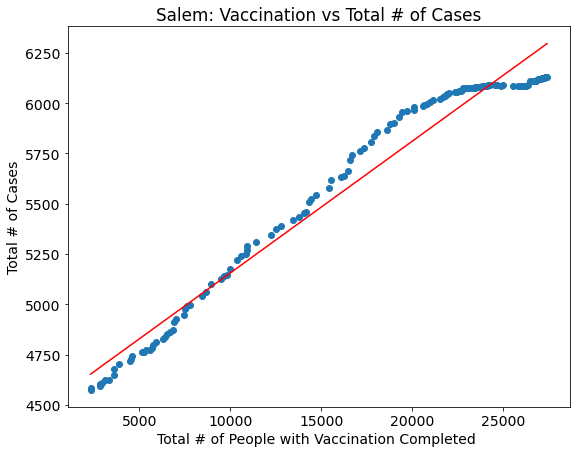

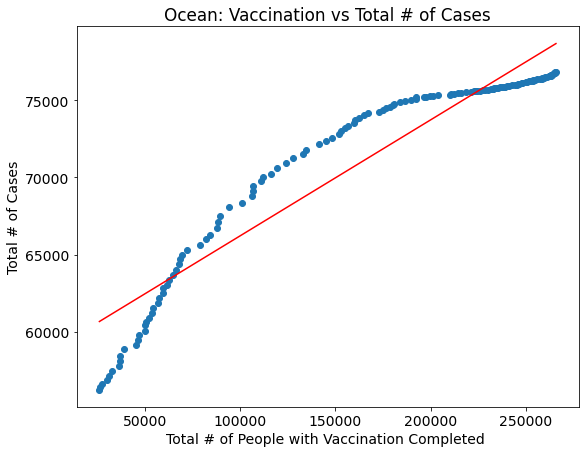

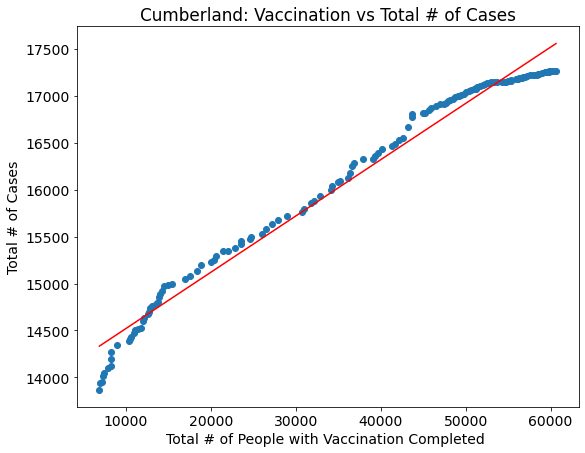

In [427]:
#Any County in NJ (from county_list) 
R_V = []
line_equation = []

for onecounty in county_list:
    print(onecounty)
    
    one_county = nc_vaccine_df.loc[nc_vaccine_df ['County'] == onecounty]

    #plot: setting x_values, y_values 
    x_values =one_county["Vaccination Completed"]
    y_values =  one_county["Total New Cases"]

    from scipy import stats
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values, creating line equation string
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    line_equation.append([line_eq])
    #print(line_eq)

    # Create Plot
    plt.figure(figsize=(9,7))
    x_values = one_county["Vaccination Completed"]
    y_values =  one_county["Total New Cases"]
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.title(onecounty + ": Vaccination vs Total # of Cases")
    plt.ylabel("Total # of Cases")
    plt.xlabel("Total # of People with Vaccination Completed ")


    #plt.annotate(line_eq,(35000,14250),fontsize=15,color="red")  
    
    print(f"The r-squared is: {rvalue**2}")
    R_V.append([rvalue**2])
    
    #plt.text(35000,14000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
    #plt.savefig("../Images/Linear_regr_Vaccinaction_"+onecounty+".png")
    
Linear_Regression_Values =pd.DataFrame({'County':county_list,'R-squared': R_V, 'Line Equation': line_equation})    
Linear_Regression_Values

In [318]:
lin_regress_csv_data = Linear_Regression_Values.to_csv('LinRegress.csv', index = False)


### Age Groups and Vaccination

In [160]:
q_url="https://data.cdc.gov/resource/8xkx-amqh.json?recip_state=NJ&$select=date,fips,recip_county,series_complete_yes, series_complete_12plus,series_complete_18plus,series_complete_65plus,administered_dose1_recip,administered_dose1_recip_12plus,administered_dose1_recip_18plus,administered_dose1_recip_65plus"
q_url="https://data.cdc.gov/resource/8xkx-amqh.json?
response = requests.get(q_url).json()


Object `amqh.json` not found.


In [161]:
params = {
        "recip_state" :"NJ",
        "$select": "date,fips,recip_county,series_complete_yes,series_complete_12plus,series_complete_18plus,series_complete_65plus,administered_dose1_recip,administered_dose1_recip_12plus,administered_dose1_recip_18plus,administered_dose1_recip_65plus",
        "$limit": "20000"
        }
q_url="https://data.cdc.gov/resource/8xkx-amqh.json"
#q_url="https://data.cdc.gov/resource/8xkx-amqh.json?recip_state=NJ&$select=date,fips,recip_county,series_complete_yes, series_complete_12plus,series_complete_18plus,series_complete_65plus,administered_dose1_recip,administered_dose1_recip_12plus,administered_dose1_recip_18plus,administered_dose1_recip_65plus"
response = requests.get(q_url, params=params).json()

In [162]:
source_df = pd.DataFrame(response)
source_df['date_new']=source_df['date'].str.slice(0,10) 
source_df.head()

,date,fips,recip_county,series_complete_yes,series_complete_12plus,series_complete_18plus,series_complete_65plus,administered_dose1_recip,administered_dose1_recip_12plus,administered_dose1_recip_18plus,administered_dose1_recip_65plus,date_new
0,2021-07-22T00:00:00.000,34003,Bergen County,569319,569310,536503,133499,635851,635802,597096,145384,2021-07-22
1,2021-07-22T00:00:00.000,34039,Union County,284959,284951,267553,55972,335086,335047,313646,65753,2021-07-22
2,2021-07-22T00:00:00.000,34011,Cumberland County,52622,52622,50426,13820,68125,68125,65344,18383,2021-07-22
3,2021-07-22T00:00:00.000,34041,Warren County,54623,54623,52500,16991,63071,63068,60411,18565,2021-07-22
4,2021-07-22T00:00:00.000,34031,Passaic County,253761,253754,241737,56320,295197,295142,279586,63168,2021-07-22


In [163]:
age_clean_df =pd.DataFrame(source_df.dropna(subset=['series_complete_yes','series_complete_12plus','series_complete_18plus','series_complete_65plus','administered_dose1_recip',
                                        'administered_dose1_recip_12plus','administered_dose1_recip_18plus','administered_dose1_recip_65plus']))


group_age_clean_df =pd.DataFrame(age_clean_df.loc[age_clean_df['fips']!="UNK"])
group_age_clean_df.head()

,date,fips,recip_county,series_complete_yes,series_complete_12plus,series_complete_18plus,series_complete_65plus,administered_dose1_recip,administered_dose1_recip_12plus,administered_dose1_recip_18plus,administered_dose1_recip_65plus,date_new
0,2021-07-22T00:00:00.000,34003,Bergen County,569319,569310,536503,133499,635851,635802,597096,145384,2021-07-22
1,2021-07-22T00:00:00.000,34039,Union County,284959,284951,267553,55972,335086,335047,313646,65753,2021-07-22
2,2021-07-22T00:00:00.000,34011,Cumberland County,52622,52622,50426,13820,68125,68125,65344,18383,2021-07-22
3,2021-07-22T00:00:00.000,34041,Warren County,54623,54623,52500,16991,63071,63068,60411,18565,2021-07-22
4,2021-07-22T00:00:00.000,34031,Passaic County,253761,253754,241737,56320,295197,295142,279586,63168,2021-07-22


In [164]:
group_age_clean_df["fips"] = group_age_clean_df["fips"].astype(int)
group_age_clean_df['series_complete_yes'] = group_age_clean_df['series_complete_yes'].astype(float)
group_age_clean_df['series_complete_12plus'] = group_age_clean_df['series_complete_12plus'].astype(float)
group_age_clean_df['series_complete_18plus'] = group_age_clean_df['series_complete_18plus'].astype(float)
group_age_clean_df['series_complete_65plus'] = group_age_clean_df['series_complete_65plus'].astype(float)
group_age_clean_df['administered_dose1_recip'] = group_age_clean_df['administered_dose1_recip'].astype(float)
group_age_clean_df['administered_dose1_recip_12plus'] = group_age_clean_df['administered_dose1_recip_12plus'].astype(float)
group_age_clean_df['administered_dose1_recip_18plus'] = group_age_clean_df['administered_dose1_recip_18plus'].astype(float)
group_age_clean_df['administered_dose1_recip_65plus'] = group_age_clean_df['administered_dose1_recip_65plus'].astype(float)

group_age_clean_df

,date,fips,recip_county,series_complete_yes,series_complete_12plus,series_complete_18plus,series_complete_65plus,administered_dose1_recip,administered_dose1_recip_12plus,administered_dose1_recip_18plus,administered_dose1_recip_65plus,date_new
0,2021-07-22T00:00:00.000,34003,Bergen County,569319.0,569310.0,536503.0,133499.0,635851.0,635802.0,597096.0,145384.0,2021-07-22
1,2021-07-22T00:00:00.000,34039,Union County,284959.0,284951.0,267553.0,55972.0,335086.0,335047.0,313646.0,65753.0,2021-07-22
2,2021-07-22T00:00:00.000,34011,Cumberland County,52622.0,52622.0,50426.0,13820.0,68125.0,68125.0,65344.0,18383.0,2021-07-22
3,2021-07-22T00:00:00.000,34041,Warren County,54623.0,54623.0,52500.0,16991.0,63071.0,63068.0,60411.0,18565.0,2021-07-22
4,2021-07-22T00:00:00.000,34031,Passaic County,253761.0,253754.0,241737.0,56320.0,295197.0,295142.0,279586.0,63168.0,2021-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...
4326,2021-01-07T00:00:00.000,34031,Passaic County,253.0,253.0,253.0,31.0,5719.0,5718.0,5713.0,713.0,2021-01-07
4332,2021-01-07T00:00:00.000,34029,Ocean County,52.0,52.0,52.0,17.0,7360.0,7359.0,7359.0,1100.0,2021-01-07
4342,2021-01-06T00:00:00.000,34013,Essex County,62.0,62.0,62.0,11.0,10545.0,10544.0,10543.0,1954.0,2021-01-06
4344,2021-01-06T00:00:00.000,34003,Bergen County,111.0,111.0,111.0,17.0,17609.0,17605.0,17597.0,2320.0,2021-01-06


In [165]:
age_groups_mer_pd = group_age_clean_df.merge(population_df, how ="left", on ="fips")
age_groups_mer_pd.head()


,date,fips,recip_county,series_complete_yes,series_complete_12plus,series_complete_18plus,series_complete_65plus,administered_dose1_recip,administered_dose1_recip_12plus,administered_dose1_recip_18plus,administered_dose1_recip_65plus,date_new,Total Population
0,2021-07-22T00:00:00.000,34003,Bergen County,569319.0,569310.0,536503.0,133499.0,635851.0,635802.0,597096.0,145384.0,2021-07-22,932202.0
1,2021-07-22T00:00:00.000,34039,Union County,284959.0,284951.0,267553.0,55972.0,335086.0,335047.0,313646.0,65753.0,2021-07-22,556341.0
2,2021-07-22T00:00:00.000,34011,Cumberland County,52622.0,52622.0,50426.0,13820.0,68125.0,68125.0,65344.0,18383.0,2021-07-22,149527.0
3,2021-07-22T00:00:00.000,34041,Warren County,54623.0,54623.0,52500.0,16991.0,63071.0,63068.0,60411.0,18565.0,2021-07-22,105267.0
4,2021-07-22T00:00:00.000,34031,Passaic County,253761.0,253754.0,241737.0,56320.0,295197.0,295142.0,279586.0,63168.0,2021-07-22,501826.0


In [168]:
percent_age_vaccine = pd.DataFrame(age_groups_mer_pd[["date_new","fips","recip_county"]])
percent_age_vaccine

,date_new,fips,recip_county
0,2021-07-22,34003,Bergen County
1,2021-07-22,34039,Union County
2,2021-07-22,34011,Cumberland County
3,2021-07-22,34041,Warren County
4,2021-07-22,34031,Passaic County
...,...,...,...
4099,2021-01-07,34031,Passaic County
4100,2021-01-07,34029,Ocean County
4101,2021-01-06,34013,Essex County
4102,2021-01-06,34003,Bergen County


In [169]:
percent_age_vaccine["Pct completed age 65+"]= age_groups_mer_pd["series_complete_65plus"]/age_groups_mer_pd["series_complete_yes"]*100
percent_age_vaccine["Pct completed age 18+"]= age_groups_mer_pd["series_complete_18plus"]/age_groups_mer_pd["series_complete_yes"]*100
percent_age_vaccine["Pct completed age 12+"]= age_groups_mer_pd["series_complete_12plus"]/age_groups_mer_pd["series_complete_yes"]*100
percent_age_vaccine["Pct completed age 18-65"]= percent_age_vaccine["Pct completed age 18+"]-percent_age_vaccine["Pct completed age 65+"]
percent_age_vaccine["Pct completed age 12-18"]= percent_age_vaccine["Pct completed age 12+"]-percent_age_vaccine["Pct completed age 18+"]
percent_age_vaccine["Pct completed age 0-12"]= 100 - percent_age_vaccine["Pct completed age 12+"]
percent_age_vaccine.head()

,date_new,fips,recip_county,Pct completed age 65+,Pct completed age 18+,Pct completed age 12+,Pct completed age 18-65,Pct completed age 12-18,Pct completed age 0-12
0,2021-07-22,34003,Bergen County,23.448892,94.235920,99.998419,70.787028,5.762499,0.001581
1,2021-07-22,34039,Union County,19.642124,93.891753,99.997193,74.249629,6.105440,0.002807
2,2021-07-22,34011,Cumberland County,26.262780,95.826840,100.000000,69.564061,4.173160,0.000000
3,2021-07-22,34041,Warren County,31.105944,96.113359,100.000000,65.007414,3.886641,0.000000
4,2021-07-22,34031,Passaic County,22.194112,95.261683,99.997241,73.067571,4.735558,0.002759


In [171]:
Data_date = "2021-06-26"
pct_by_age_vaccine = percent_age_vaccine.loc[percent_age_vaccine["date_new"]==Data_date]#.sort_values(by=['Percentage completed'], ascending =False)
pct_by_age_vaccine_round= pct_by_age_vaccine.round(decimals=2)
pct_by_age_vaccine_round.head()



,date_new,fips,recip_county,Pct completed age 65+,Pct completed age 18+,Pct completed age 12+,Pct completed age 18-65,Pct completed age 12-18,Pct completed age 0-12
546,2021-06-26,34029,Ocean County,40.32,98.27,100.0,57.95,1.73,0.0
547,2021-06-26,34033,Salem County,32.33,96.78,100.0,64.45,3.22,0.0
548,2021-06-26,34001,Atlantic County,29.00,97.02,100.0,68.02,2.97,0.0
549,2021-06-26,34021,Mercer County,22.35,94.56,100.0,72.21,5.44,0.0
550,2021-06-26,34037,Sussex County,27.82,96.90,100.0,69.08,3.10,0.0


In [172]:
merged_age_vaccine_df = pct_by_age_vaccine_round.merge(percent_vaccine_round, how='inner', on='fips')
merged_age_vaccine_df.head()

,date_new,fips,recip_county,Pct completed age 65+,Pct completed age 18+,Pct completed age 12+,Pct completed age 18-65,Pct completed age 12-18,Pct completed age 0-12,date,county,Percentage completed,Percentage initiated,Percentage of Cases/Total Population
0,2021-06-26,34029,Ocean County,40.32,98.27,100.0,57.95,1.73,0.0,2021-06-26,Ocean,42.41,47.23,12.58
1,2021-06-26,34033,Salem County,32.33,96.78,100.0,64.45,3.22,0.0,2021-06-26,Salem,42.75,48.30,9.80
2,2021-06-26,34001,Atlantic County,29.00,97.02,100.0,68.02,2.97,0.0,2021-06-26,Atlantic,49.65,56.01,12.00
3,2021-06-26,34021,Mercer County,22.35,94.56,100.0,72.21,5.44,0.0,2021-06-26,Mercer,53.14,61.42,9.30
4,2021-06-26,34037,Sussex County,27.82,96.90,100.0,69.08,3.10,0.0,2021-06-26,Sussex,50.52,55.93,10.04


In [173]:
age_group_by_vacc_df = merged_age_vaccine_df.rename(columns={'date_new':'Date','fips':'Fips','county':'County'})
#age_group_by_vacc_df                                                    
new_vacc_age_df=age_group_by_vacc_df[['Date','County','Percentage completed','Percentage initiated','Pct completed age 0-12','Pct completed age 12-18', 'Pct completed age 18-65','Pct completed age 65+']]
new_vacc_age_df.head()

,Date,County,Percentage completed,Percentage initiated,Pct completed age 0-12,Pct completed age 12-18,Pct completed age 18-65,Pct completed age 65+
0,2021-06-26,Ocean,42.41,47.23,0.0,1.73,57.95,40.32
1,2021-06-26,Salem,42.75,48.30,0.0,3.22,64.45,32.33
2,2021-06-26,Atlantic,49.65,56.01,0.0,2.97,68.02,29.00
3,2021-06-26,Mercer,53.14,61.42,0.0,5.44,72.21,22.35
4,2021-06-26,Sussex,50.52,55.93,0.0,3.10,69.08,27.82


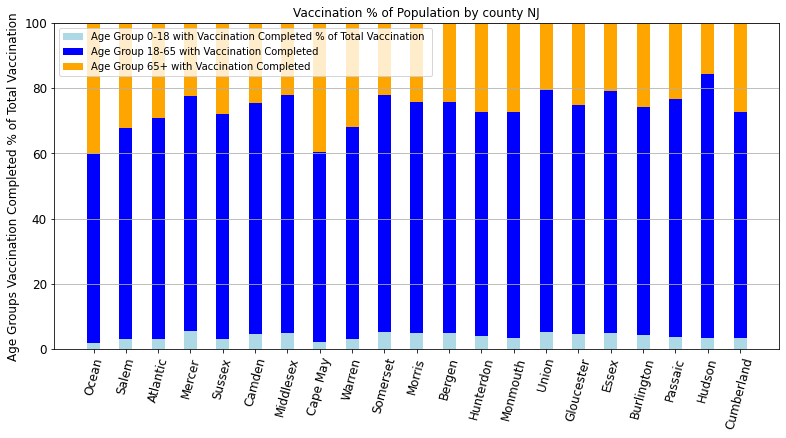

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
header = ['Age Group 0-18 with Vaccination Completed % of Total Vaccination ','Age Group 18-65 with Vaccination Completed',
          'Age Group 65+ with Vaccination Completed']
dataset = [new_vacc_age_df["Pct completed age 12-18"],new_vacc_age_df['Pct completed age 18-65'],
           new_vacc_age_df['Pct completed age 65+']]
X_AXIS = new_vacc_age_df["County"]

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(13.0, 6.0)

configs = dataset[0]
N = len(configs)
ind = np.arange(N)
width = 0.4
 
p1 = plt.bar(ind, dataset[0], width, color='lightblue')
p2 = plt.bar(ind, np.array(dataset[1]), width, bottom=dataset[0], color='blue')
p3 = plt.bar(ind, np.array(dataset[2]), width, bottom=dataset[0]+dataset[1], color='orange')
           
plt.ylim([0,100])
plt.yticks(fontsize=12)
plt.ylabel("Age Groups Vaccination Completed % of Total Vaccination", fontsize=12)
plt.xticks(ind, X_AXIS, fontsize=12, rotation=75)
plt.title("Vaccination % of Population by county NJ"   )
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=10)
plt.grid(axis = "y")
plt.savefig("../Images/Vaccination_Age_Groups_by_County.png")

plt.show()